# **CNN image classification model using Tensorflow**

---



**Dataset url** : "https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset"


**Contents** : zip file containing
*   12500 cat images
*   12500 dog images



**note** : folder and image paths are generalized not actual

---




# **UNZIPPING THE IMAGES FOLDER**

In [ ]:
import zipfile

zip_path = 'zip_folder_path.zip'
extract_path = 'extraction path'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


**after unzipping the images are organized in their respective folder(Cat,Dog folders)**


---



# ALL NECESSARY **IMPORTS**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# **INTIALIZING IMAGE SIZE ,BATCH SIZE AND EPOCHS FOR TRANNING**

In [ ]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 64
EPOCHS = 20
TRAIN_DIR = "image_folder_path"

# **DATA ARGUMENTATION AND GENERATOR CERATION**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 80% train, 20% validation
)

# **TRAIN GENRATOR**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)


Found 17545 images belonging to 2 classes.


# **VALIDATION GENERATOR**

In [ ]:
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 4385 images belonging to 2 classes.


# **CUSTOM CNN MODEL**

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

# **COMPILING THE MODEL**

In [ ]:
tf.keras.mixed_precision.set_global_policy('mixed_float16')
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# **CREATING CALLBACKS AND EXTRACTING BEST MODEL WHILE TRANNING**

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint('model extraction path',
                    save_best_only=True)
]

# **FITTING THE MODEL WITH HISTORY**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,s
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
124/274 ━━━━━━━━━━━━━━━━━━━━ 1:33 622ms/step - accuracy: 0.5748 - loss: 4.6180

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.5874 - loss: 3.0409

274/274 ━━━━━━━━━━━━━━━━━━━━ 231s 807ms/step - accuracy: 0.5875 - loss: 3.0350 - val_accuracy: 0.4605 - val_loss: 0.9159
Epoch 2/20
  1/274 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - accuracy: 0.6250 - loss: 0.6617

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


274/274 ━━━━━━━━━━━━━━━━━━━━ 45s 163ms/step - accuracy: 0.6250 - loss: 0.6617 - val_accuracy: 0.4561 - val_loss: 0.8836
Epoch 3/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.6413 - loss: 0.6263

274/274 ━━━━━━━━━━━━━━━━━━━━ 262s 955ms/step - accuracy: 0.6413 - loss: 0.6264 - val_accuracy: 0.5400 - val_loss: 0.7454
Epoch 4/20
  1/274 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.5312 - loss: 0.6992

274/274 ━━━━━━━━━━━━━━━━━━━━ 42s 155ms/step - accuracy: 0.5312 - loss: 0.6992 - val_accuracy: 0.5457 - val_loss: 0.7335
Epoch 5/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.6666 - loss: 0.6027

274/274 ━━━━━━━━━━━━━━━━━━━━ 232s 780ms/step - accuracy: 0.6666 - loss: 0.6026 - val_accuracy: 0.6751 - val_loss: 0.5732
Epoch 6/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 80s 292ms/step - accuracy: 0.7500 - loss: 0.5190 - val_accuracy: 0.6765 - val_loss: 0.5738
Epoch 7/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 244s 786ms/step - accuracy: 0.6977 - loss: 0.5637 - val_accuracy: 0.6767 - val_loss: 0.5849
Epoch 8/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 42s 152ms/step - accuracy: 0.7188 - loss: 0.5428 - val_accuracy: 0.6847 - val_loss: 0.5781
Epoch 9/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.7152 - loss: 0.5525

274/274 ━━━━━━━━━━━━━━━━━━━━ 216s 771ms/step - accuracy: 0.7152 - loss: 0.5525 - val_accuracy: 0.7452 - val_loss: 0.5188
Epoch 10/20
  1/274 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.8125 - loss: 0.5298

274/274 ━━━━━━━━━━━━━━━━━━━━ 81s 297ms/step - accuracy: 0.8125 - loss: 0.5298 - val_accuracy: 0.7410 - val_loss: 0.5171
Epoch 11/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 260s 843ms/step - accuracy: 0.7412 - loss: 0.5283 - val_accuracy: 0.7381 - val_loss: 0.5458
Epoch 12/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.7500 - loss: 0.4849 - val_accuracy: 0.7176 - val_loss: 0.5751
Epoch 13/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 261s 953ms/step - accuracy: 0.7421 - loss: 0.5240 - val_accuracy: 0.6909 - val_loss: 0.6082
Epoch 14/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.7969 - loss: 0.4179 - val_accuracy: 0.6994 - val_loss: 0.5884


# **PLOTTING ACCURACIES OF TRANNING AND VALIDATION IMAGES**

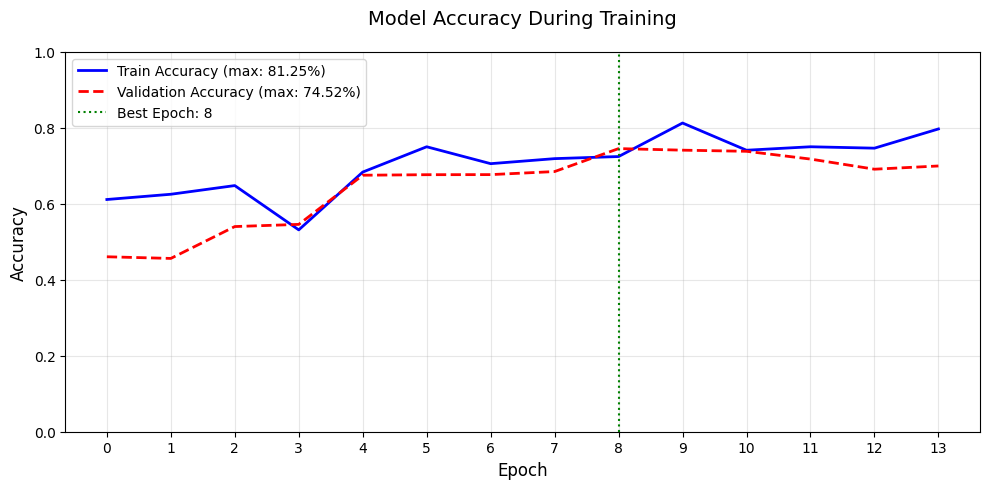


Training Summary:
- Reached 79.69% final training accuracy
- Reached 69.94% final validation accuracy
- Best validation accuracy: 74.52% at epoch 8


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(history.history['accuracy'],
         label=f'Train Accuracy (max: {max(history.history["accuracy"]):.2%})',
         color='blue',
         linewidth=2)

plt.plot(history.history['val_accuracy'],
         label=f'Validation Accuracy (max: {max(history.history["val_accuracy"]):.2%})',
         color='red',
         linestyle='--',
         linewidth=2)

plt.title('Model Accuracy During Training', fontsize=14, pad=20)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(range(len(history.history['accuracy'])))
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right', framealpha=1)


best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
plt.axvline(x=best_epoch, color='green', linestyle=':',
            label=f'Best Epoch: {best_epoch}')

plt.legend()
plt.tight_layout()
plt.show()


print(f"\nTraining Summary:")
print(f"- Reached {history.history['accuracy'][-1]:.2%} final training accuracy")
print(f"- Reached {history.history['val_accuracy'][-1]:.2%} final validation accuracy")
print(f"- Best validation accuracy: {max(history.history['val_accuracy']):.2%} at epoch {best_epoch}")

# **PLOTTING LOSSES OF TRANNING AND VALIDATION IMAGES**

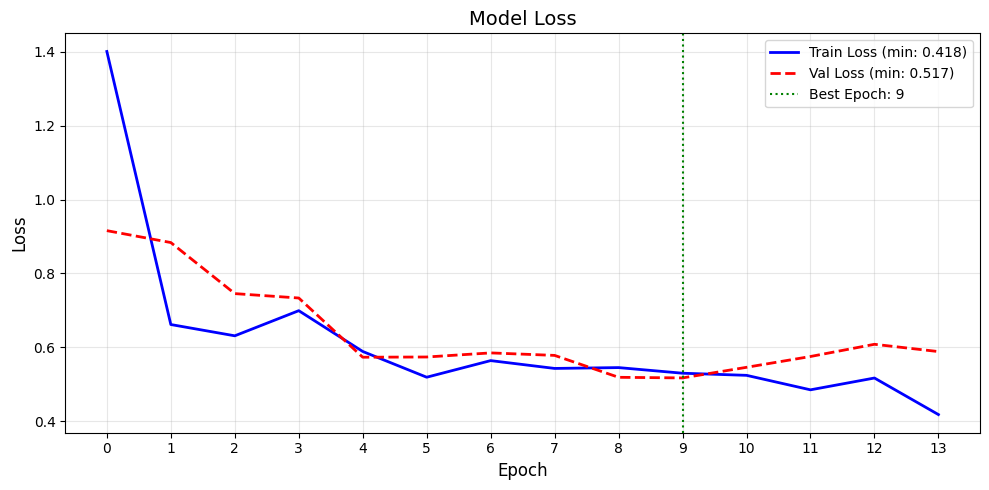

In [ ]:
plt.figure(figsize=(10, 5))
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label=f'Train Loss (min: {np.min(train_loss):.3f})',
         color='blue', linewidth=2)
plt.plot(val_loss, label=f'Val Loss (min: {np.min(val_loss):.3f})',
         color='red', linestyle='--', linewidth=2)

best_epoch_loss = np.argmin(val_loss)
plt.axvline(x=best_epoch_loss, color='green', linestyle=':',
            label=f'Best Epoch: {best_epoch_loss}')

plt.title('Model Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(range(len(train_loss)))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# **MAKING PREDICTIONS WITH RANDOM IMAGES**

In [ ]:
common_path = "test images path"
test_images_paths =  [
    common_path +"Cat/image.jpg",
    common_path +"Dog/image.jpg",
    common_path +"Cat/image.jpg",
    common_path +"Dog/image.jpg",
    common_path +"Cat/iage.jpg",
    common_path +"Dog/image.jpg",
]

In [ ]:
best_model = tf.keras.models.load_model('extracted model path.h5')

In [ ]:
def predict_and_display(image_path, target_size=(150, 150)):
    model = best_model

    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, verbose=0)[0][0]
    confidence = max(prediction, 1 - prediction)
    class_name = "Dog" if prediction > 0.5 else "Cat"

    plt.imshow(img)
    plt.title(f"{class_name} ({confidence:.1%} confidence)")
    plt.axis('off')
    plt.show()

    return class_name, float(confidence)


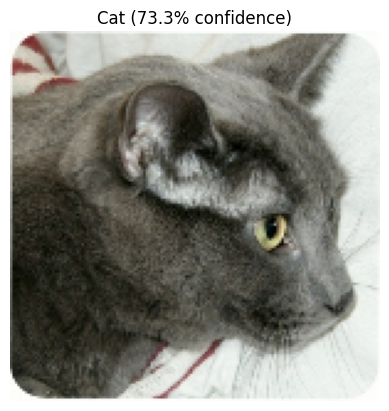

('Cat', 0.7333724498748779)

In [ ]:
predict_and_display(test_images_paths[0])

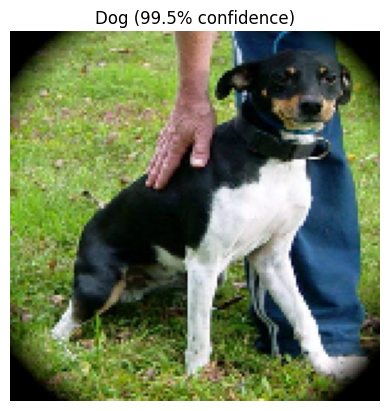

('Dog', 0.9953996539115906)

In [ ]:
predict_and_display(test_images_paths[1])

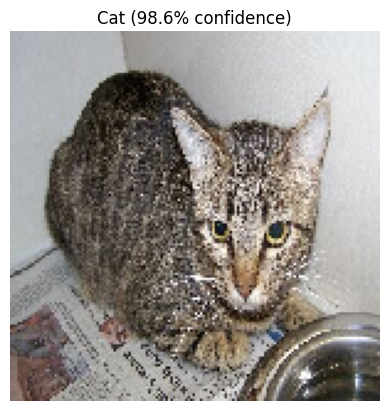

('Cat', 0.9856715798377991)

In [ ]:
predict_and_display(test_images_paths[2])

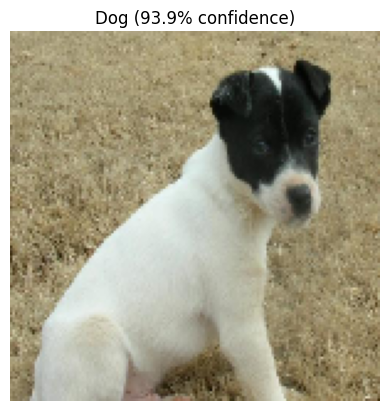

('Dog', 0.9392951130867004)

In [ ]:
predict_and_display(test_images_paths[3])

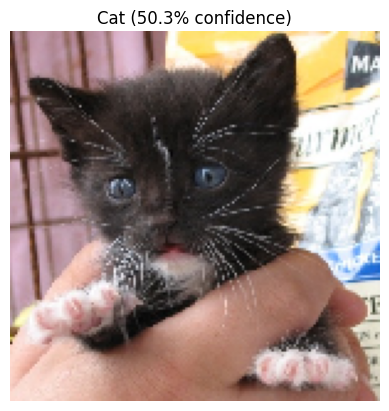

('Cat', 0.5032738447189331)

In [ ]:
predict_and_display(test_images_paths[4])

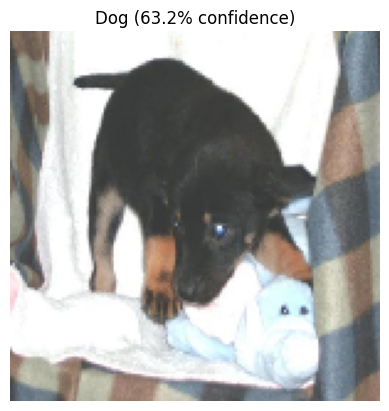

('Dog', 0.6317604184150696)

In [ ]:
predict_and_display(test_images_paths[5])